# Introduction

## Problem Statement

## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats




## Reading the Data

In [2]:
filename = 'bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(filename, index_col=0)
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.tail()


,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
df.shape

(3333, 20)

In [5]:
#Check for missing values
print(df.isnull().sum())

account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


The dataset contains 0 null values

In [6]:
print(df.dtypes)

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [7]:
df.columns.tolist()

['account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

## Exploratory Data Analysis

### Univariate Analysis

#### Distribution of subscribers by target attribute churn. What is the percentage of loyal subscribers?

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='churn', ylabel='count'>

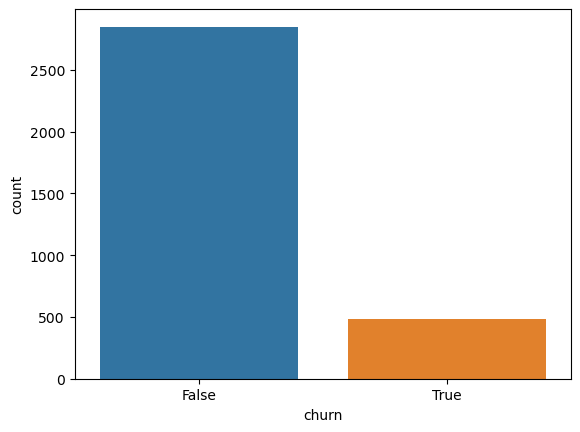

In [8]:
sns.countplot(data=df, x='churn', )

In [9]:
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

###### The above visualization shows the distribution of subscribers using the target variable Churn. It shows that SyriaTel  retain 85.5% of their total customers.

#####   State with the Highest and Lowest Number of Calls (All types of calls)

In [10]:
# State with the highest number of calls
all_calls = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls']
total_calls = df.groupby('state')[all_calls].sum().sum(axis=1).sort_values()

print('The state with the highest number of calls is :' , total_calls.idxmax() , total_calls.max())
print('The state with the lowest number of calls is :' , total_calls.idxmin() , total_calls.min())

The state with the highest number of calls is : WV 32682
The state with the lowest number of calls is : CA 10632


#### Checking if subscribers who make international calls purchase the International Call Plan

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

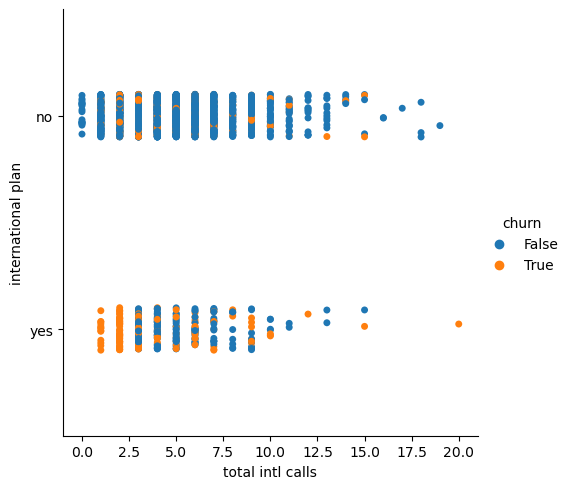

In [13]:
sns.catplot(data=df, x='total intl calls', y='international plan', hue = 'churn')

In [14]:
df.groupby('international plan')['total intl calls'].value_counts()

international plan  total intl calls
no                  3                   595
                    4                   559
                    2                   442
                    5                   439
                    6                   302
                    7                   194
                    1                   147
                    8                   106
                    9                    95
                    10                   43
                    11                   26
                    0                    18
                    12                   14
                    13                   12
                    14                    6
                    15                    5
                    18                    3
                    16                    2
                    17                    1
                    19                    1
yes                 3                    73
                    4                  

#### States with the Highest and Lowest Churn Rate

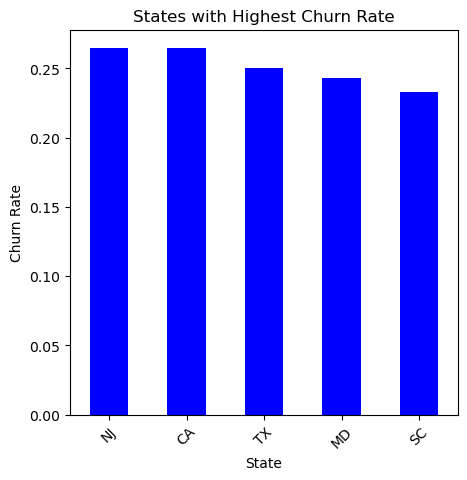

In [15]:
# Calculate the churn rate for each state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)

# Select the top states with the highest churn rate
top_states_churn = state_churn_rate.head(5)

# Visualize the states with the highest churn rate using a bar plot
plt.figure(figsize=(5, 5))
top_states_churn.plot(kind='bar', color='blue') 
plt.title('States with Highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

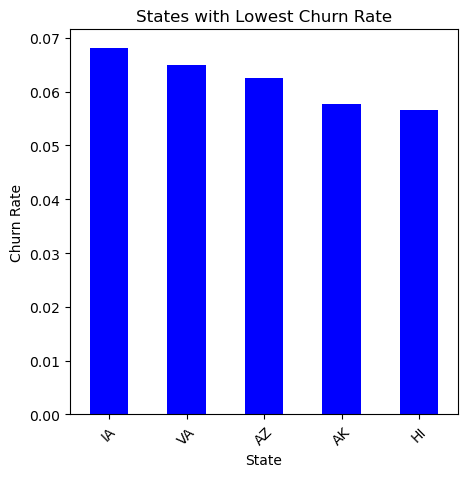

In [16]:
# Calculate the churn rate for each state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)

# Select the top states with the lowest churn rate
low_states_churn = state_churn_rate.tail(5)

# Visualize the states with the lowest churn rate using a bar plot
plt.figure(figsize=(5, 5))
low_states_churn.plot(kind='bar', color='blue') 
plt.title('States with Lowest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

#### Relationship between calls made to the customer service center and the target variable churn

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

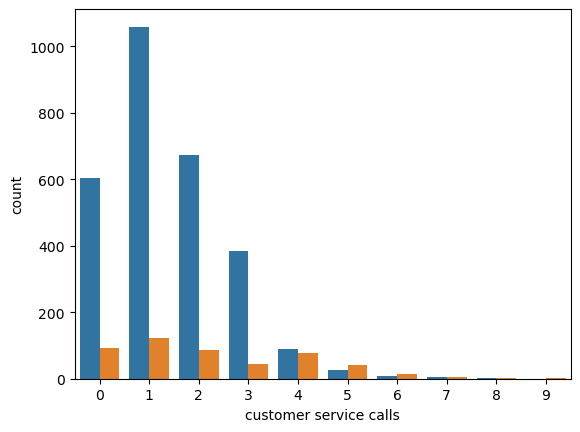

In [17]:
sns.countplot(data=df, x='customer service calls', hue='churn')

#### Correlation between numerical features

In [18]:
# Get descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
description = df[numerical_cols].describe(include='all')
description

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<Axes: >

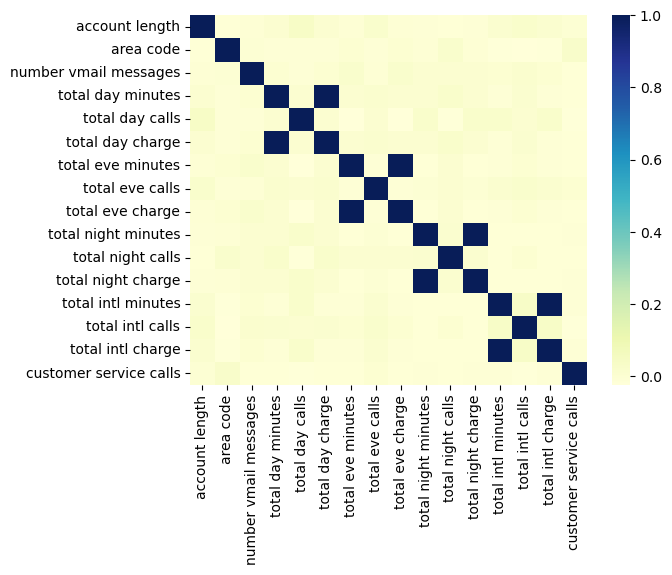

In [19]:
#Which numerical values have the highest degree of correlation
numeric_feats = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'bool')].index
sns.heatmap(df[numeric_feats].corr(), cmap="YlGnBu")

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


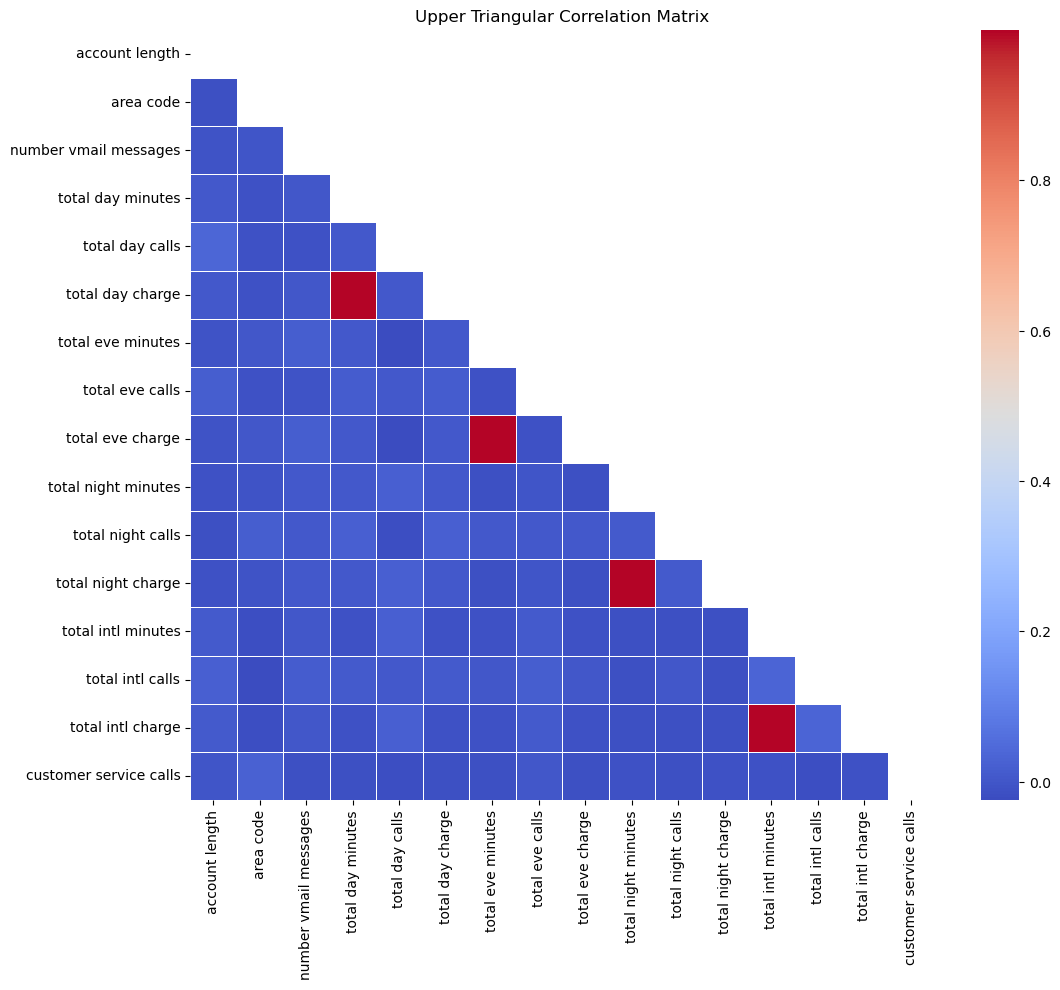

In [20]:
# Select only numeric columns for correlation analysis
numeric_df = df[numeric_feats]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap for visualization with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Upper Triangular Correlation Matrix')
plt.show()

### What other insights can be found in the available data?

Text(0.5, 0, 'Total Night Charge')

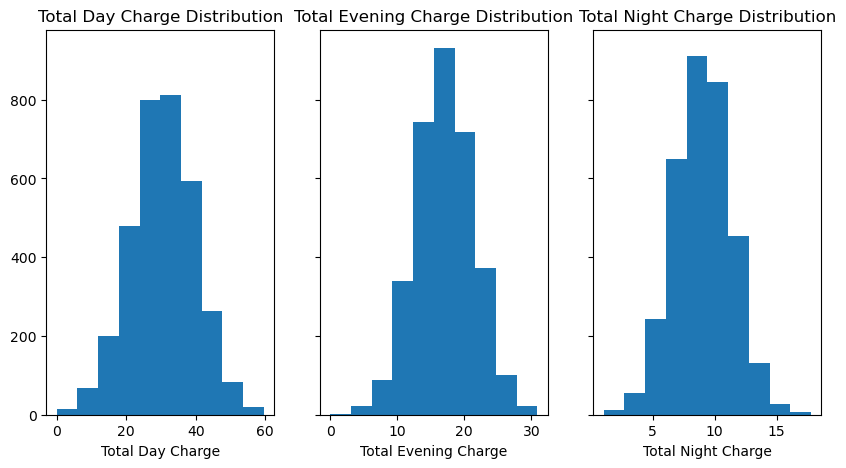

In [21]:
# Relationship Between Day, Evening and Night Charges
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
axs[0].hist(data=df, x='total day charge', label='Day Charge')
axs[1].hist(data=df, x='total eve charge', label='Evening Charge')
axs[2].hist(data=df, x='total night charge', label = 'Night Charge')

axs[0].set_title('Total Day Charge Distribution')
axs[1].set_title('Total Evening Charge Distribution')
axs[2].set_title('Total Night Charge Distribution')
axs[0].set_xlabel('Total Day Charge')
axs[1].set_xlabel('Total Evening Charge')
axs[2].set_xlabel('Total Night Charge')

In [22]:
print(stats.pointbiserialr(df['churn'], df['total day charge']))
print(stats.pointbiserialr(df['churn'], df['total eve charge']))
print(stats.pointbiserialr(df['churn'], df['total night charge']))

SignificanceResult(statistic=0.20515074317015242, pvalue=5.300605952412188e-33)
SignificanceResult(statistic=0.09278603942871307, pvalue=8.036524227776378e-08)
SignificanceResult(statistic=0.03549555624050648, pvalue=0.040451218769055254)


In [23]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']
print(stats.pointbiserialr(df['churn'], df['total charge']))

SignificanceResult(statistic=0.2269617454153734, pvalue=3.3815074744627273e-40)


Text(0.5, 1.0, 'Total Night Charge Distribution')

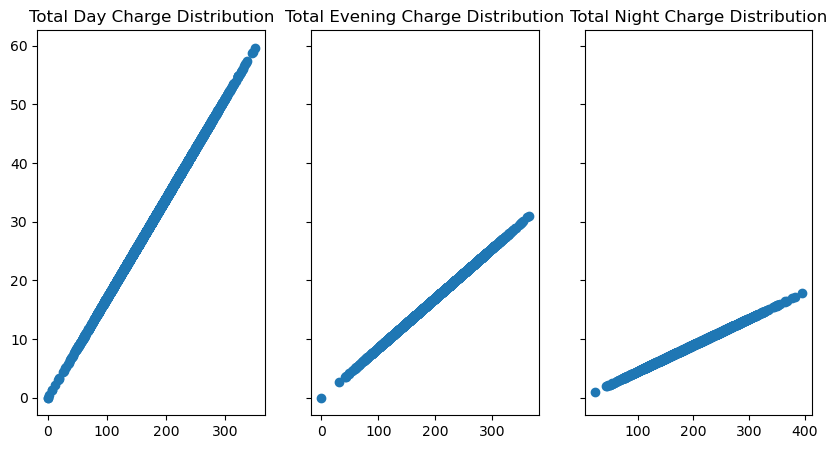

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
axs[0].scatter(data=df, x='total day minutes', y='total day charge')
axs[1].scatter(data=df, x='total eve minutes', y='total eve charge')
axs[2].scatter(data=df, x='total night minutes', y='total night charge')
axs[0].set_title('Total Day Charge Distribution')
axs[1].set_title('Total Evening Charge Distribution')
axs[2].set_title('Total Night Charge Distribution')

In [ ]:
sns.histplot(binwidth=0.5, x="churn", hue="area code", data=df, stat="count", multiple="stack").set(title="People churning in different area codes")

In [ ]:
df.hist(by='churn', column='number vmail messages')

### Day, Night, Evening and International Calls
Checking if there is any correlation between whether a person churns or not v/s the day, night, evening and international calls

In [ ]:
from scipy.stats import norm

def plotNormalDistribution(seriesName, titleName):
  
  mu = seriesName.mean()
  sigma = seriesName.std()

  density = pd.DataFrame()
  density["x"] = np.linspace(
      seriesName.min(), seriesName.max(), 100
  )
  density["pdf"] = norm.pdf(density["x"], mu, sigma)

  fig, ax = plt.subplots()
  sns.histplot(seriesName, ax=ax, kde=True, stat="density")
  ax.plot(density["x"], density["pdf"], color="red")
  plt.title(titleName)
  plt.show()

Day Calls

In [ ]:
df['average duration of day call'] = df['total day minutes'] / df['total day calls']
df['average cost of day call'] = df['total day charge'] / df['total day calls']


sns.boxplot(x='churn', y='average duration of day call', data=df).set(title='Plot of average duration of day calls for churners and non-churners')

In [ ]:
#Red colour is the predicted normal distribution whereas blue is the actual kernel density estimation
plotNormalDistribution(df[df['churn'] == True]['total day minutes'], 'Distribution of total day minutes for churners')

In [ ]:
plotNormalDistribution(df[df['churn'] == False]['total day minutes'], 'Distribution of total day minutes for non-churners')

In [ ]:
df['average duration of eve call'] = df['total eve minutes'] / df['total eve calls']
df['average cost of eve call'] = df['total eve charge'] / df['total eve calls']

sns.boxplot(x='churn', y='average duration of eve call', data=df).set(title='Plot of average duration of evening calls for churners and non-churners')

Night Calls

In [ ]:
df['average duration of night call'] = df['total night minutes'] / df['total night calls']
df['average cost of night call'] = df['total night charge'] / df['total night calls']

In [ ]:
plotNormalDistribution(df[df['churn'] == False]['total night minutes'], 'Distribution of total night minutes for non-churners')

In [ ]:
plotNormalDistribution(df[df['churn'] == True]['total night minutes'], 'Distribution of total night minutes for churners')

In [ ]:
sns.boxplot(x='churn', y='average duration of night call', data=df).set(title='Plot of average duration of night calls for churners and non-churners')

In [ ]:
sns.boxplot(x='churn', y='average cost of night call', data=df).set(title='Plot of average cost of night calls for churners and non-churners')

Customer Service Calls

In [ ]:
#Determining relationship between the number of calls to the customer service center and churn
stats.pointbiserialr(df['churn'], df['customer service calls'])

In [ ]:
sns.set(rc={'figure.figsize':(11,10)})
sns.boxplot(x='churn', y='customer service calls', data=df).set(title='Plot of customer service calls for churners and non-churners')

Correlation across the different attributes
We perform correlation across the different attributes. We can clearly see that the total day minutes and total charge impacts whether a person will churn or not. Apart from that, there is not a lot of correlation which we can see in the dataset.

In [ ]:
df['churn'].dtype

### Decision Trees

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
ip, vmp = df['international plan'].map({'yes': 1, 'no': 0}), df['voice mail plan'].map({'yes': 1, 'no': 0})

df['international plan'], df['voice mail plan'] = ip, vmp
df['churn'] = df['churn'].astype('int')


df = pd.concat([df], axis=1) 
df.drop(['phone number'], axis=1, inplace=True)

df.head()

In [ ]:

X = df.drop(['churn'],axis=1)

y = df['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=12)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier() 
dt_model

In [ ]:
dt_model.fit(X_train,y_train)

In [ ]:
y_pred = dt_model.predict(X_test)

# Evaluation Metrics

- The following are nessecary evaluation metrics:

    1. classification_report

    2. confusion_matrix

    3. accuracy_score

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

**90.4077% is very high and must be verified. Use the Cross Validation Algorithum**

# Cross Validation

**Import the Cross Validation library**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(estimator=dt_model,X=X_train,y=y_train,cv=10)

print("Cross Validation Score :",cv_scores.mean())


# Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
#Create a visual of the Confusion Matrix using a heatmap
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix,annot=True,cmap='YlGnBu')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

# Inferences from the Classification Report

# Decision Tree Visulization



In [ ]:

from sklearn import tree
# Create a list of the columns
F = X.columns

features = list(F)
#Get the target variables
classes = 'churn'

In [ ]:
import numpy as np

# Assuming data is your training data
#classes = np.unique(df['churn'])  # Replace 'data.target' with your actual target column

plt.figure(figsize=(5,5))
tree = tree.plot_tree(dt_model, filled=True, feature_names=features, 
                      class_names=classes)


# Hyperparameter Optimization

- Use the GridSearch CV to find the best hyperparameters.

In [ ]:
dt_model2 = DecisionTreeClassifier()

**Create parameters variables**

In [ ]:
dt_params = {'criterion':['gini','entropy'],
             "max_depth": np.arange(2,14,2),
             "max_features":["auto","sqrt","log2"]}

**Create a new CV model**

In [ ]:
dt_cv_model = GridSearchCV(estimator=dt_model2,param_grid=dt_params,cv=10)

**Fit the X_train and y_train data**

In [ ]:
dt_cv_model.fit(X_train,y_train)

**Use the .best_params method to find the best hyperparameters**

In [ ]:
dt_cv_model.best_params_

**The fine tunned model's hyperparameters will be as follows:**

    {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}

**Create a new Tuned variable with the correct hyperparameters**    

In [ ]:
dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=10,max_features='sqrt')

**Fit X_train and y_train**

In [ ]:
dt_tuned.fit(X_train,y_train)

**Predict the X_test**

In [ ]:
y_pred = dt_tuned.predict(X_test)

# Tunned Model Evaluation

- Use the same evaluation metrics as before

In [ ]:
#Accuarcy Score
print(accuracy_score(y_test,y_pred))

**Conduct a Cross Validation Test**

In [ ]:
cv_scores1 = cross_val_score(estimator=dt_tuned,X=X_train,y=y_train,cv=10)

print("Cross Validation of Tunned Model:", cv_scores1.mean())

**The score has improved**

# Revisualize the Decision Tree

In [ ]:
plt.figure(figsize=(5,20))
tree2 = tree.plot_tree(dt_tuned,filled=True, feature_names=features,class_names=targets)

# Random Forest Algorithm

- The Random Forest Algorithm aims to increase the classification by generating many decision trees. 

    - Can be used for both Classification and Regression problems   

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#create the model variable
rf_model = RandomForestClassifier()
#fit the X_train and y_train data
rf_model.fit(X_train,y_train)
#Predict the X_test
y_pred_1 = rf_model.predict(X_test)

# Evaluation of Model Using Metrics

In [ ]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_1))

**Cross Validation**

In [ ]:
cv_scores = cross_val_score(estimator=rf_model,X=X_train,y=y_train,cv=10)

cv_scores.mean()

# Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,y_pred_1))

In [ ]:
#Visualize the Confusion Matrix

cnf_matrix_1 = confusion_matrix(y_test,y_pred_1)

sns.heatmap(cnf_matrix_1,annot=True,cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,y_pred_1))

**Visualize the Random Forest Tree**

In [ ]:
#Display 1 tree only
plt.figure(figsize=(20,20))

tree3 = tree.plot_tree(rf_model.estimators_[0],filled=True,feature_names=features,class_names=targets)

# Hyperparameters Optimization 

In [ ]:
#Create a new model

rf_model2 = RandomForestClassifier()

In [ ]:
#Create Hyperparameter Dictionary
rf_params = {"n_estimators":[50,100,300],
             "max_depth":[3,5,7],
             "max_features":[2,4,6,8],
             "min_samples_split":[2,4,6]
}

**Define new Cross Validation Model**

In [ ]:
rf_cv_model = GridSearchCV(estimator=rf_model2,param_grid=rf_params,cv=5,n_jobs= -1)

**Fit the X_train and y_train**

In [ ]:
rf_cv_model.fit(X_train,y_train)

**Find the Best Parameters**

In [ ]:
rf_cv_model.best_params_

**Create a tunned model variable**

In [ ]:
rf_tunned = RandomForestClassifier(max_depth=7,max_features=8,min_samples_split=4,n_estimators=300)

**Fit the X_train and y_train**

In [ ]:
rf_tunned.fit(X_train,y_train)

**Predict the X_test**

In [ ]:
y_pred_rf = rf_tunned.predict(X_test)

# Evaluation Metrics

In [ ]:
print("Accuracy Score", accuracy_score(y_test,y_pred_rf))

**Cross Validation**

In [ ]:
cv_scores_rf = cross_val_score(estimator=rf_tunned,X=X_train,y=y_train,cv=10)

cv_scores_rf.mean()

In [ ]:
print(confusion_matrix(y_test,y_pred_rf))

In [ ]:
print(classification_report(y_test,y_pred_rf))

# Visualizing the Best Features of a Dataset

- Identify the best features using the .feature_importances

In [ ]:
rf_tunned.feature_importances_

In [ ]:
xtrain_df = pd.DataFrame(X_train)
if len(df.columns) > 0:
  # Column names are preserved in the DataFrame
  print(df.columns)
else:
  print("Column names not found in the NumPy array.")

In [ ]:
# Create pandas Series 
best_features = pd.Series(rf_tunned.feature_importances_,index=xtrain_df).sort_values(ascending=False)

best_features